Once you choose your data, do a data analysis using these techniques we learned:



Graphing (Make at least your final graph an interactive graph)
Then, discuss a few questions we can answer using this data and choose one. Create a model that will predict a value/category of a variable in your dataset to answer the question you have chosen. Use one of the models we have learned in class:

Linear Regression
Logistic Regression
Naive Bayes
Finally, do some evaluation of your results (e.g., Accuracy, Precision, Recall, MAE, SSE, MSE, etc.)

When completed, create a presentation of what you found. You can do this as a video or as a paper. (If you want to do a video presentation, you have free access to Microsoft Teams which can help you create the video. I can help you with this - come talk to me so I can help.) The presentation should include:

A sample of the original data (along with a description of variables and where the data was obtained)
Some of the challenges with the data (Was there missing data? How did you wrangle the data?)
Show the figures and explain what certain features of the graphs tell us
Make some conclusions from your analysis, and describe where you could go in the future (another analysis, create a model, …)
Put all of your files into a github repository and copy the link to the repository here. Be sure to include the following in your repository:

dataset
readme.md file including the source for your data - https://www.kaggle.com/datasets/joebeachcapital/30000-spotify-songs
.ipynb file where you made your calculations and figures
If you recorded a video, include the link to the video in a readme.md file within your repository.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
import plotly.express as px

## Obtaining data
## Missing Data
## Data Wrangling

In [8]:
data = pd.read_csv("spotify_songs.csv")
data.isna().sum()
data[data['track_name'].isna()]
data = data.dropna() #only 5 observations
data.corr(numeric_only = True)

FileNotFoundError: [Errno 2] No such file or directory: 'spotify_songs.csv'

In [82]:
data.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [7]:
data['playlist_subgenre'].unique()

array(['dance pop', 'post-teen pop', 'electropop', 'indie poptimism',
       'hip hop', 'southern hip hop', 'gangster rap', 'trap',
       'album rock', 'classic rock', 'permanent wave', 'hard rock',
       'tropical', 'latin pop', 'reggaeton', 'latin hip hop',
       'urban contemporary', 'hip pop', 'new jack swing', 'neo soul',
       'electro house', 'big room', 'pop edm',
       'progressive electro house'], dtype=object)

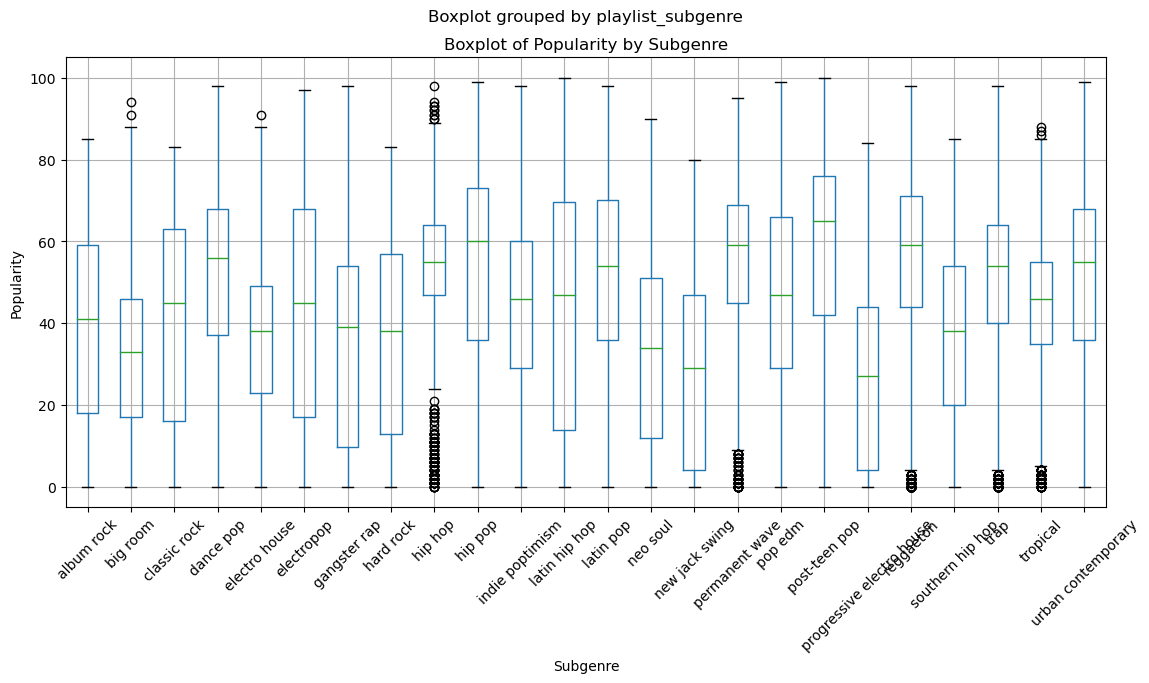

In [8]:
#for genre in data['playlist_subgenre'].unique():
data.boxplot(column='track_popularity', by='playlist_subgenre', figsize=(13, 6))
plt.title('Boxplot of Popularity by Subgenre')
plt.xlabel('Subgenre')
plt.ylabel('Popularity')
plt.xticks(rotation=45)  
plt.show()
#i'm not sure how to organize this by medians

<AxesSubplot:xlabel='playlist_subgenre', ylabel='track_popularity'>

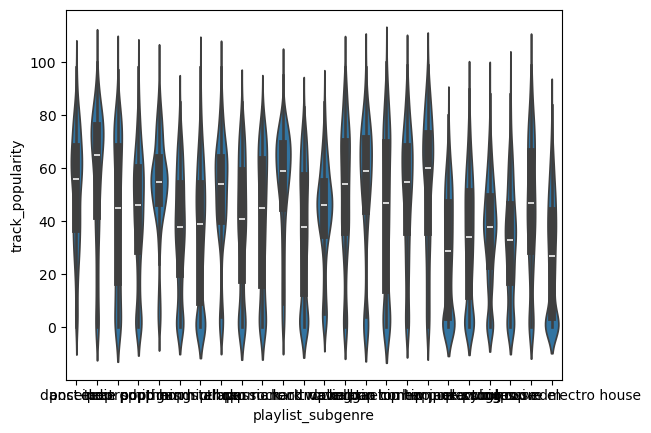

In [9]:
sns.violinplot(data, x='playlist_subgenre', y='track_popularity')


In [ ]:
#loudness energy
#acoustic loud
#acoustic energy

In [7]:
px.scatter(data, x='loudness', y='energy', color='playlist_genre')


NameError: name 'data' is not defined

<AxesSubplot:xlabel='loudness', ylabel='acousticness'>

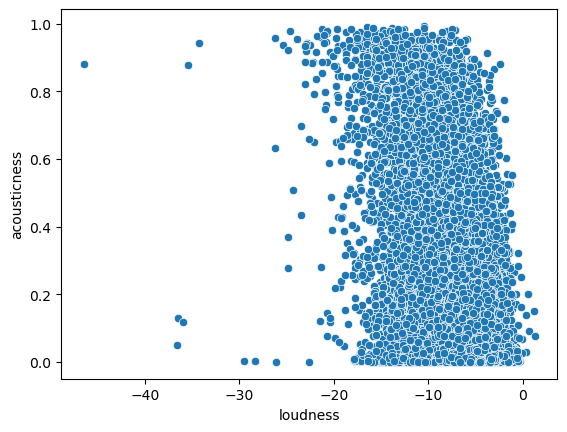

In [12]:
sns.scatterplot(data=data, x='loudness', y='acousticness')

<AxesSubplot:xlabel='acousticness', ylabel='energy'>

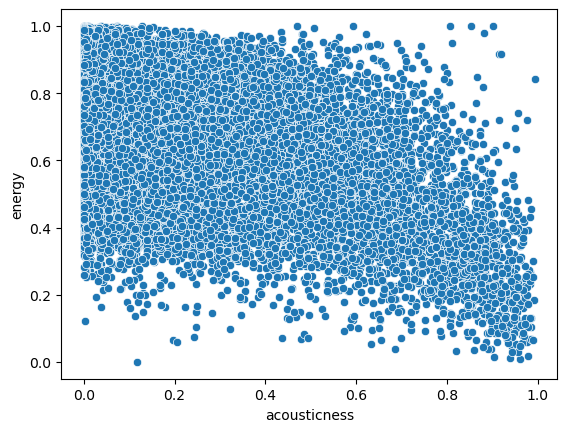

In [13]:
sns.scatterplot(data=data, x='acousticness', y='energy')

In [135]:
#regression equations
def myplot(df, xval, yval, color=False):
    if (color==False):
        sns.scatterplot(data=df, x=xval, y=yval).set(title='Correlation')
    else:
        sns.scatterplot(data=df, x=xval, y=yval, hue='playlist_subgenre').set(title='Correlation')
        
def get_linreg(df, xval, yval):
    x_bar = df[xval] - df[xval].mean()
    y_bar = df[yval] - df[yval].mean()
    b_1 = (x_bar.dot(y_bar)) / (x_bar.dot(x_bar))
    b_0 = df[yval].mean() - b_1 * (df[xval].mean())

    return b_0, b_1

def get_linspace(X, b0, b1):
    x = np.linspace(X.min(), X.max(), 100)
    y = b0 + b1*x
    
    return x,y

def linreg_plot(df, xval, yval, color=False):
    myplot(df, xval, yval, color)

    b0, b1 = get_linreg(df, xval, yval)
    x,y = get_linspace(df[xval], b0, b1)

    plt.plot(x, y, c='r')
    return b0,b1

# MAE, SSE, MSE, RMSE, RMSLE
def MAE(m, b, data, column):
    total_error = 0
    for index, row in data.iterrows():
        predicted_value = m * row[column] + b  # Calculate the predicted value using the linear regression line equation
        actual_value = row[column]  # Get the actual value from the dataframe
        total_error += abs(actual_value - predicted_value)  # Calculate the absolute error
    mean_error = total_error / len(data)  # Calculate the mean absolute error
    return mean_error

def SSE(m, b, data, column):
    total_error = 0
    for index, row in data.iterrows():
        predicted_value = m * row[column] + b  
        actual_value = row[column]  
        total_error += (actual_value - predicted_value)**2  
    mean_error = total_error / len(data) 
    return mean_error

def RMSE(m, b, data, column):
    val = SSE(m,b,data,column)
    return math.sqrt(val)

def RMSLE(m,b,data,column):
    total_error = 0
    for index, row in data.iterrows():
        predicted_val=(m * row[column] + b)+1
        actual_val=row[column]+1
        total_error += math.log(actual_val/predicted_val) ** 2
    mean_error = math.sqrt(total_error / len(data)) 
    
    return mean_error

## Linear Regression

## evaluation 

the mean absolute error of this is: 0.03637483574388475
the square sum error of this is: 0.0013561335372042494
the root square sum error of this is: 0.036825718420748416
the root log square sum error of this is: 0.0331544676966478


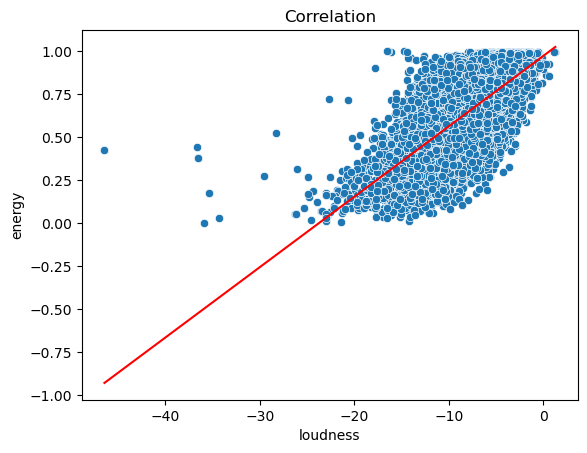

In [136]:
lex,ley = linreg_plot(data, "loudness", "energy")

square = SSE(lex,ley, data, 'acousticness')
meanabsolute= MAE(lex,ley, data, 'acousticness')
rootmean = RMSE(lex,ley, data, 'acousticness')
logrootmean = RMSLE(lex,ley, data, 'acousticness')

print(f"the mean absolute error of this is: {meanabsolute}")
print(f"the square sum error of this is: {square}")
print(f"the root square sum error of this is: {rootmean}")
print(f"the root log square sum error of this is: {logrootmean}")


the mean absolute error of this is: 0.20249877321097215
the square sum error of this is: 0.08956139509069333
the root square sum error of this is: 0.29926809901941326
the root log square sum error of this is: 0.242031007329945


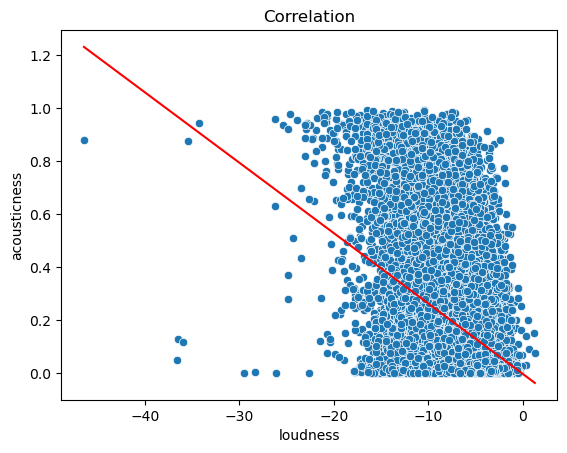

In [137]:
lax, lay = linreg_plot(data, "loudness", "acousticness")

square = SSE(lax,lay, data, 'acousticness')
meanabsolute= MAE(lax,lay, data, 'acousticness')
rootmean = RMSE(lax,lay, data, 'acousticness')
logrootmean = RMSLE(lax,lay, data, 'acousticness')

print(f"the mean absolute error of this is: {meanabsolute}")
print(f"the square sum error of this is: {square}")
print(f"the root square sum error of this is: {rootmean}")
print(f"the root log square sum error of this is: {logrootmean}")

the mean absolute error of this is: 0.48374545105535444
the square sum error of this is: 0.2364182237312825
the root square sum error of this is: 0.48622857148802195
the root log square sum error of this is: 0.542864797287819


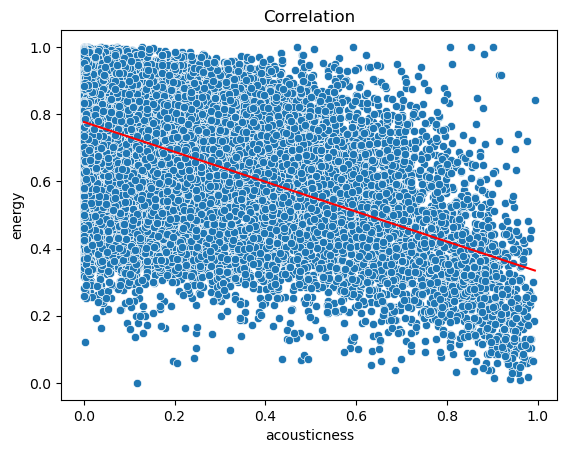

In [133]:
aex, aey = linreg_plot(data, "acousticness", "energy")

square = SSE(aex,aey, data, 'acousticness')
meanabsolute= MAE(aex,aey, data, 'acousticness')
rootmean = RMSE(aex,aey, data, 'acousticness')
logrootmean = RMSLE(aex,aey, data, 'acousticness')

print(f"the mean absolute error of this is: {meanabsolute}")
print(f"the square sum error of this is: {square}")
print(f"the root square sum error of this is: {rootmean}")
print(f"the root log square sum error of this is: {logrootmean}")